# Customer Segmentation 

![](customer-segmentation-analysis.png)

In [36]:
#importing the relevant Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch

In [2]:
#Import the data
data = pd.read_csv('Mall_Customers.csv')

In [3]:
#Peek at the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Data shape
data.shape

(200, 5)

The data comprises 200 observations and 5 features.

# Exploratory Data Analysis

###  Univariate  Analysis

In [5]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

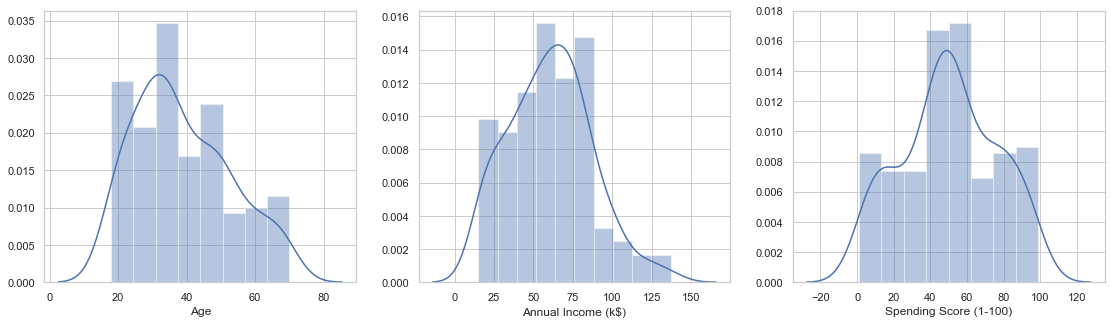

In [6]:
#Plot the Distribution of continous variables
sns.set(style = 'whitegrid')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(19,5))

sns.distplot(data.Age, ax=ax1)
sns.distplot(data['Annual Income (k$)'], ax=ax2)
sns.distplot(data['Spending Score (1-100)'], ax=ax3)

plt.show()

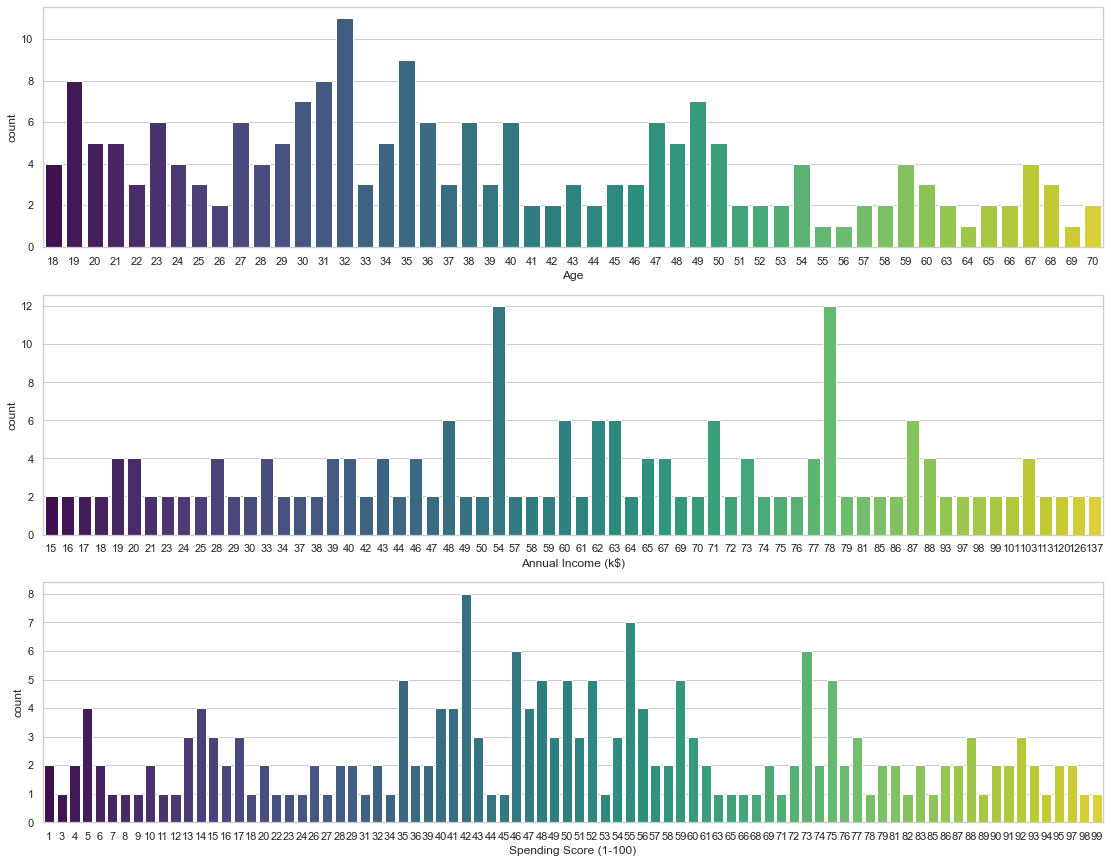

In [7]:
#Plot Frequency Distribution for numerical features
sns.set(style = 'whitegrid')

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(19,15))

sns.countplot(data.Age, ax=ax1, palette = 'viridis')
sns.countplot(data['Annual Income (k$)'], ax=ax2, palette = 'viridis')
sns.countplot(data['Spending Score (1-100)'], ax=ax3, palette = 'viridis')

plt.show()

### Univariate Analysis

#### Spending Score Vs Annual Income

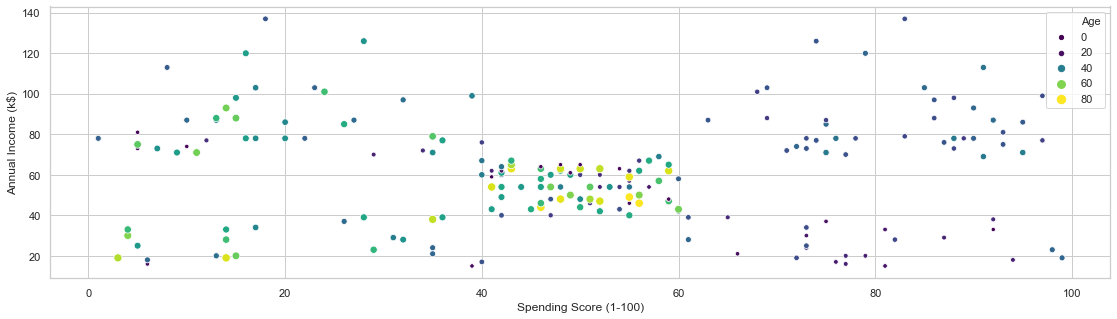

In [8]:
plt.figure(figsize=(19,5))
sns.scatterplot(data=data, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Age',palette='viridis',size='Age')
plt.show()

#### Spending Score (1-100) Vs Age

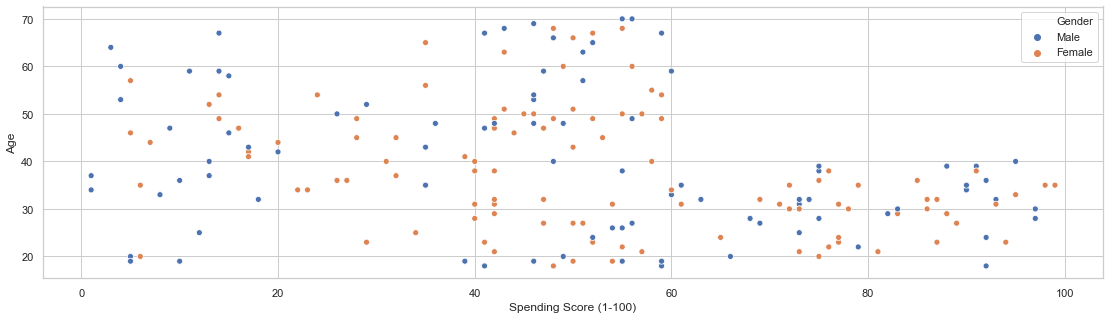

In [9]:
plt.figure(figsize=(19,5))
sns.scatterplot(data=data, x='Spending Score (1-100)', y='Age', hue='Gender')
plt.show()

#### Gender Vs Spending Score (1-100)

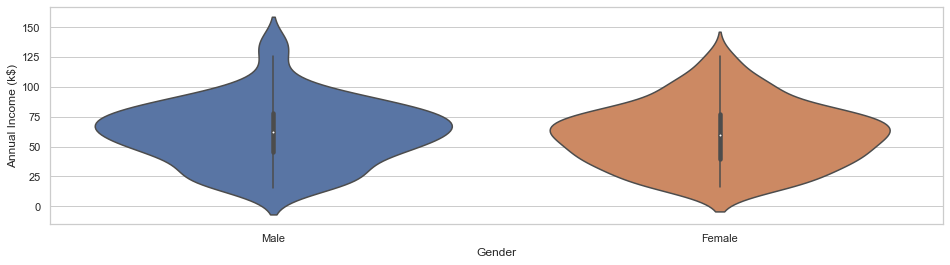

In [11]:
plt.figure(figsize=(16,4))
sns.violinplot(data['Gender'], data['Annual Income (k$)'])
plt.show()

#### Gender Vs Annual Income (k$) 

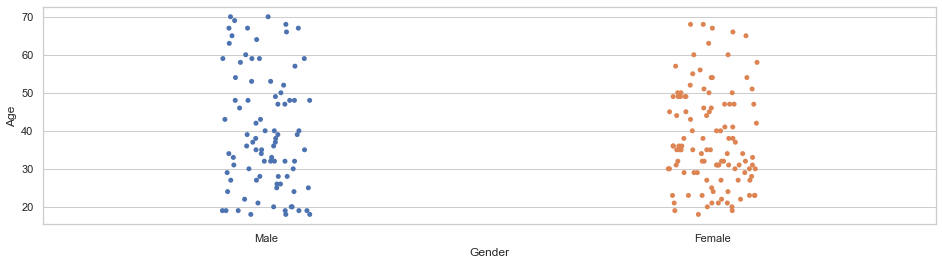

In [12]:
plt.figure(figsize=(16,4))

sns.stripplot(data['Gender'], data['Age'])

plt.show()

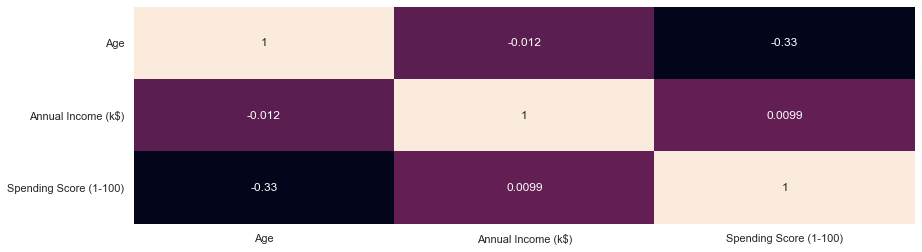

In [13]:
corr = data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

plt.figure(figsize=(14,4))
sns.heatmap(corr, annot=True, cbar=False )
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with beige Color and least correlated features with black color.

`We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features`

## Data Preprocessing

#### 1.Encode Categorical Features 

- Feeding data into an algorithm with categorical variables will no doubt raise an error. And deleting this variables would be ever the best solution.This variables represent some information related to our problem and how khow it might contribue more to get better result
- To leverage from this variables, in our case the Gender variable i will encode it by get_dummies method provided in pandas library

In [14]:
data = pd.get_dummies(data, columns=['Gender'])

#### 2.Drop Irrelevant Features

The Column Id is often removed from the data feeded to a machine learning algorithm. It a useless feature, we can't derive any information from it. Additionally it could mislead our model and ultimetly bias the performance.

In [15]:
data.drop(['CustomerID'], axis=1, inplace=True)

#### 3.Feature Scaling 

- Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

- The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of our algorithm.

In [16]:
std_data = StandardScaler().fit_transform(data) 
std_data = pd.DataFrame(data = std_data, columns=data.columns)

# Customers segmentation with K-means

### Spending score and annual income

In [17]:
score_income_data = std_data[['Spending Score (1-100)','Annual Income (k$)']].values

- **Elbow method** helps to select the optimal number of clusters by fitting the model with a range of values for K.If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
- Sometimes determining the elbow point isn’t always straightforward. Kneed libary to the rescue, it hepls us to identify the elbow point programmaticaly !!


In [18]:
def elbow_plot(data):
    
    """
    - This function trains the KMeans model on different k (number of clusters) values, 
    - then, it appends in each iteration the sum of the squared error (SSE) obtained in the inertias list 
        --> Note : The quality of the cluster assignments is determined by computing the sum of the squared error (SSE)
    - finally it plots the elbow plot and prints the optimal elbow point with its corresponding SSE
    
    """
    
    inertias = []

    # Creating 10 K-Mean models while varying the number of clusters (k)
    for k in range(1,11):
        model = KMeans(n_clusters=k,
                   n_init=10,    
                   max_iter=300, 
                   init='k-means++', 
                   random_state=0)
    
        # Fit model to samples
        model.fit(data)
    
        # Append the inertia and silhuette_coefficient to the list of inertias and silhouette_coefs accordingly
        inertias.append(model.inertia_)
    
    # The elbow plot
    plt.figure(figsize=(18,5))
    plt.plot(range(1,11), inertias, '-p', color='green')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia / sse')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    
    kl = KneeLocator(range(1,11), inertias, curve="convex", direction="decreasing" )
    print(' The elbow point of the curve : ',kl.elbow)
    print(' The lowest SSE value: ',model.inertia_)


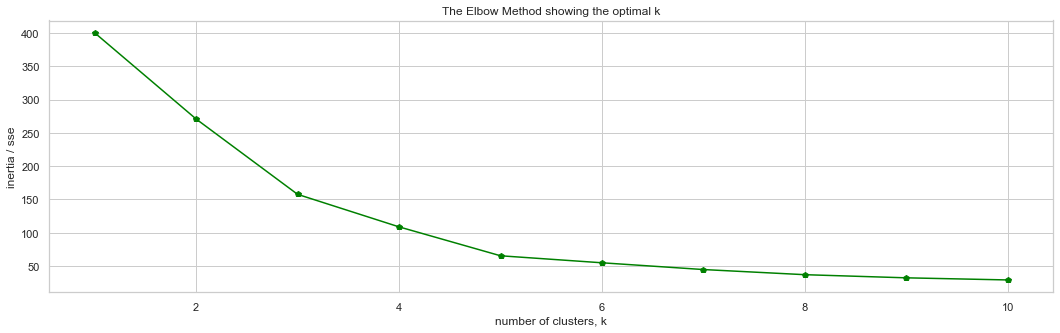

 The elbow point of the curve :  5
 The lowest SSE value:  29.316377372329573


In [19]:
elbow_plot(score_income_data)

Elbow method shows 5 is optimal and the KneeLocator proved that. But what about silhouette method? By the way, the Elbow Method and the Silhouette Method are not like alternatives to each other for finding the optimal amount of clusters. Rather they are instruments for using together for a more confident decision.

**The silhouette value** measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). It's values are within [-1;1]. _Optimal value is a peak._

In [20]:
def silhouette_scores(data):
    """
    - This function trains the KMeans algorithm on different k values ranging from 2 to 11
     various ranges of min samples from 1 to 10,
    - In every iteration it appends the silhouette coefficients to a list in order to plot them
    - At the end it plots the silhouette coefficients over the K values
    
    """
    
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        
            model = KMeans(n_clusters=k, n_init=10, max_iter=300, init='random', random_state=0)
            model.fit(data) 
            score = silhouette_score(data, model.labels_)
            silhouette_coefficients.append(score)

    
    #Plot the silhouette coefficient over the # of cluster
    plt.figure(figsize=(17,4))
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

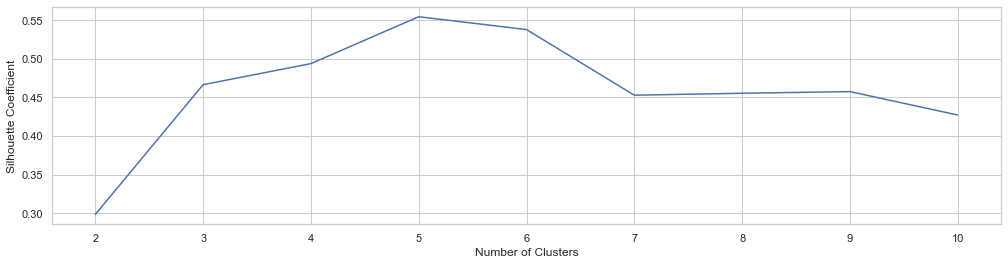

In [21]:
silhouette_scores(score_income_data)

Here again optimal value (peak) is 5. Great! Going straight to K-means model...

#### Train Our KMeans algorithm with the right number of clusters (k=5)

In [22]:
KMeans_model = KMeans(n_clusters=5,
                   n_init=10,     
                   max_iter=300, 
                   init="k-means++", 
                   random_state=0)
    
# Fit model to samples
KMeans_model.fit(score_income_data)

#Preidict the lables
y_kmeans = KMeans_model.fit_predict(score_income_data)

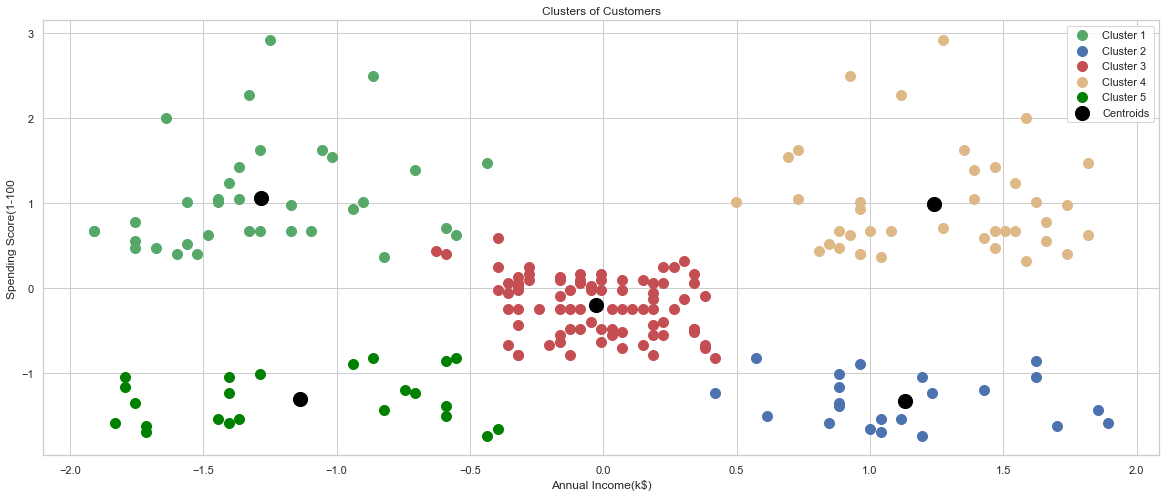

In [23]:
plt.figure(figsize=(20,8))

plt.scatter(score_income_data[y_kmeans == 0, 0], score_income_data[y_kmeans == 0, 1], s = 100, c = 'g', label = 'Cluster 1' )
plt.scatter(score_income_data[y_kmeans == 1, 0], score_income_data[y_kmeans == 1, 1], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(score_income_data[y_kmeans == 2, 0], score_income_data[y_kmeans == 2, 1], s = 100, c = 'r', label = 'Cluster 3')
plt.scatter(score_income_data[y_kmeans == 3, 0], score_income_data[y_kmeans == 3, 1], s = 100, c = 'burlywood', label = 'Cluster 4')
plt.scatter(score_income_data[y_kmeans == 4, 0], score_income_data[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')


plt.scatter(KMeans_model.cluster_centers_[:, 0], KMeans_model.cluster_centers_[:, 1], s = 200, c='black', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()

plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers and they could be describe as :


- **Green Cluster** :low annual income and high spending score (`careless `)
- **Dark Green Cluster** : low income and low spending score (`sensible`)
- **Red Cluster** : medium indome and medium spending score (`standart`)
- **Blue Cluster** : high icome and low spending rate (`careful`)
- **Beige Cluster** : high income and high spending score (`target`)


### Spending score and Age

In [27]:
score_age_data = data[['Age','Spending Score (1-100)']].values

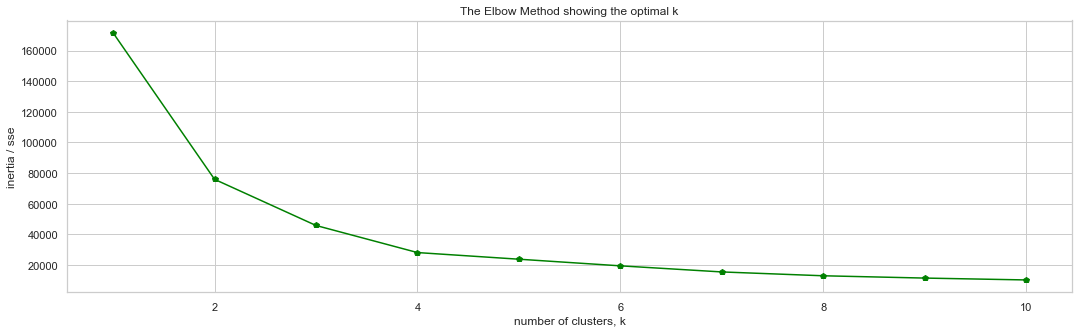

 The elbow point of the curve :  3
 The lowest SSE value:  10299.6983592504


In [28]:
elbow_plot(score_age_data)

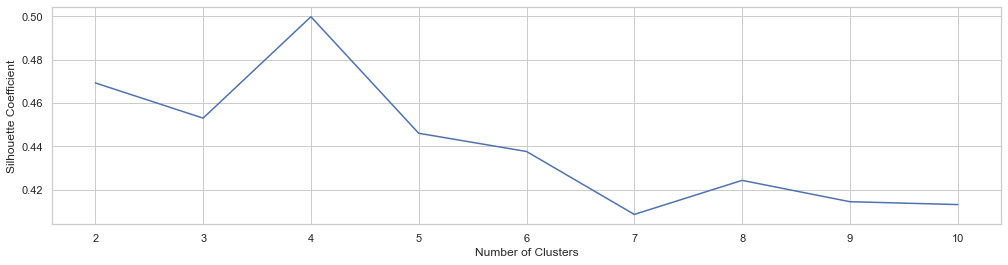

In [29]:
silhouette_scores(score_age_data)

I got different values for k, The elbow method indicates that 3 is the elbow point but the SSE related to k=3 is to high wich means that the points in the clusters are far away for its closest centroid point, whereas in silhouette_score plot the peak is in number 4.

So I will rely on the silhouette_score plot and trains my KMeans model with K=4 

In [30]:
kmeanModelAge = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeansAge= kmeanModelAge.fit_predict(score_age_data)

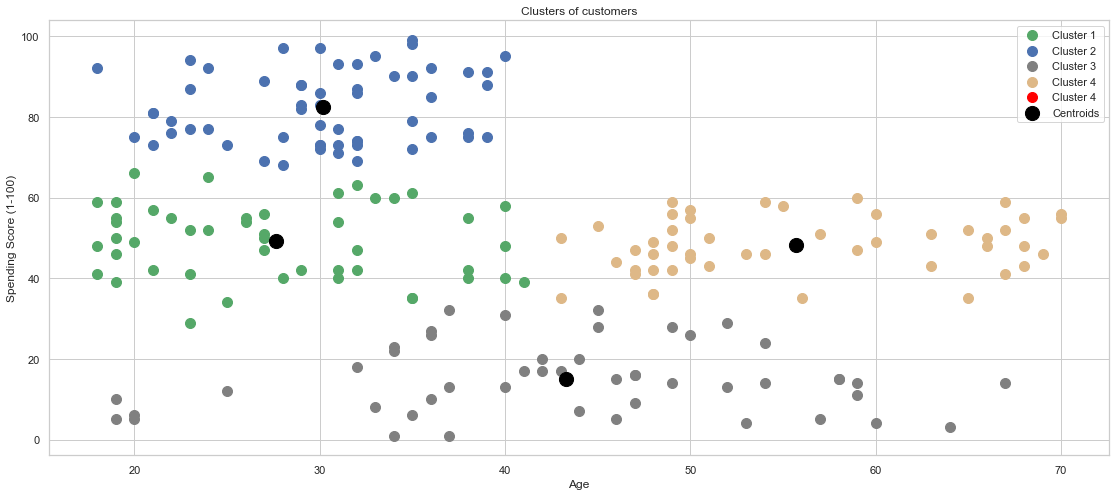

In [31]:
plt.figure(figsize=(19,8))

plt.scatter(score_age_data[y_kmeansAge == 0, 0], score_age_data[y_kmeansAge == 0, 1], s = 100, c = 'g', label = 'Cluster 1')
plt.scatter(score_age_data[y_kmeansAge == 1, 0], score_age_data[y_kmeansAge == 1, 1], s = 100, c = 'b', label = 'Cluster 2')
plt.scatter(score_age_data[y_kmeansAge == 2, 0], score_age_data[y_kmeansAge == 2, 1], s = 100, c = 'grey', label = 'Cluster 3')
plt.scatter(score_age_data[y_kmeansAge == 3, 0], score_age_data[y_kmeansAge == 3, 1], s = 100, c = 'burlywood', label = 'Cluster 4')
plt.scatter(score_age_data[y_kmeansAge == 4, 0], score_age_data[y_kmeansAge == 4, 1], s = 100, c = 'red', label = 'Cluster 4')


plt.scatter(kmeanModelAge.cluster_centers_[:, 0], kmeanModelAge.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely:

- **Gray Cluster** middle age and medium spendings
- **Beige Cluster** the elderly with medium spendings
- **Green Cluster** young and medium spending score
- **Blue Cluster** young that spend a lot (seems to be target group) 



# DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is an unsupervised machine learning technique used to identify clusters of varying shape in a data set (Ester et al. 1996).

DBSCAN has two main parameters :
- **Minimum samples** (“MinPts”): the fewest number of points required to form a cluster
- **ε** (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

#### Minimum Samples (“MinPts”)
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:
- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

#### Epsilon (ε)
One technique to automatically determine the optimal ε value is to calculate the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected.The average k-distances are then plotted in ascending order on a k-distance graph. The point of maximum curvature represents the optimal value for ε ( where the graph has the greatest slope).

### Spending score and annual income


Recently, the data that represents the Spending score and Annual income is obviously a two dimensions dataframe. Following the rules above, my minimum samples value should be 4 i will test later if it is indeed the optimal point  .

After I selected my MinPts value, I used NearestNeighbors from Scikit-learn to calculate the average distance between each point and its n_neighbors. 

In [68]:
score_income_data = std_data[['Spending Score (1-100)','Annual Income (k$)']].values

In [69]:
# Calculate the average distance between each point in the data set 
# and its 4 nearest neighbors (my selected MinPts value)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(score_income_data)
distances, indices = neighbors_fit.kneighbors(score_income_data)

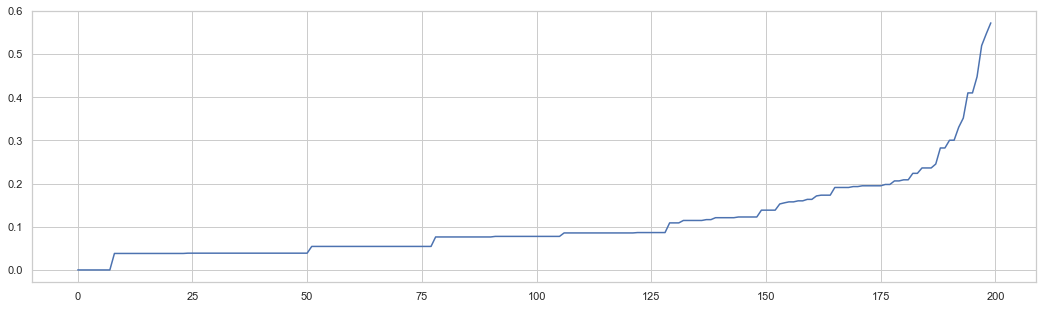

In [70]:
#Sort distance values by ascending value and plot
plt.figure(figsize=(18,5))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Now from above graph, though its not conclusive yet we are sure “epsilon(eps) value” will lie somewhere within 0.1 to 0.4. Using various possible eps values between 0.1 to 0.4 we can find silhouette score for each eps value and try to select the best eps value with highest silhouette score.

In [44]:
range_eps = [0.1, 0.2, 0.3, 0.4, 0.5]

for i in range_eps:
    print('eps value is', i)
    db = DBSCAN(eps=i, min_samples=5).fit(score_income_data)
    labels = db.fit_predict(score_income_data)
    silhouette_avg = silhouette_score(score_income_data, labels)
    print('The average Silhouette Score is', silhouette_avg)
    print('-----------------------------------------------------')

eps value is 0.1
The average Silhouette Score is -0.2700934604293137
-----------------------------------------------------
eps value is 0.2
The average Silhouette Score is 0.14057942679617566
-----------------------------------------------------
eps value is 0.3
The average Silhouette Score is 0.31614121976731197
-----------------------------------------------------
eps value is 0.4
The average Silhouette Score is 0.41325830390002166
-----------------------------------------------------
eps value is 0.5
The average Silhouette Score is 0.35044619989666004
-----------------------------------------------------


#### Find the ‘min_samples’ hyper parameter through right cluster formation method

As I have already found the ‘eps value’ to be 0.4. Now feeding that value to DBSCAN algorithm through various ranges of min samples from 1 to 10, I can find the right ‘min_samples’ value which yields me right no. of clusters. 

From below graph its evident ‘min_samples’ value should be 5 as it yields no. of clusters to be 5 which is proven by K means with silhouette score algorithm above.

In [53]:
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in min_samples:
    print('min samples values is', i)
    db = DBSCAN(eps=0.4, min_samples=i).fit(score_income_data)
    labels = db.fit_predict(score_income_data)
    # Ignoring the label '-1' as its for the outliers so this why i subtract minus 1 in len(set(labels)) - 1)
    #labels = [label for label in labels is labels >= 0 ]
    print('For min_sample value is {}, the total no. of clusters are {}'.format(i, len(set(labels)) - 1))
    print('-----------------------------------------------------')

min samples values is 1
For min_sample value is 1, the total no. of clusters are 11
-----------------------------------------------------
min samples values is 2
For min_sample value is 2, the total no. of clusters are 6
-----------------------------------------------------
min samples values is 3
For min_sample value is 3, the total no. of clusters are 4
-----------------------------------------------------
min samples values is 4
For min_sample value is 4, the total no. of clusters are 3
-----------------------------------------------------
min samples values is 5
For min_sample value is 5, the total no. of clusters are 4
-----------------------------------------------------
min samples values is 6
For min_sample value is 6, the total no. of clusters are 4
-----------------------------------------------------
min samples values is 7
For min_sample value is 7, the total no. of clusters are 4
-----------------------------------------------------
min samples values is 8
For min_sample v

For 5 clusters, i should so set a min_sample equals to 8 not 4 !!


Sometimes rules may not be applicable in some scenarios. So we have to think always to test and implement our theoretical thoughts and see if they work in real cases 

In [54]:
DBS_clustering = DBSCAN(eps=0.4, min_samples=8).fit(score_income_data)
labels = DBS_clustering.labels_
#labels

In [55]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_

5

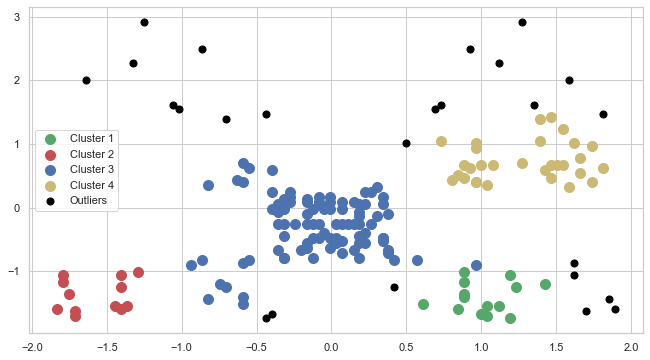

In [57]:
colors = ['g','r','b','y','burlywood','green', 'm', 'c']
plt.figure(figsize=(11,6))
for i in range(0 ,n_clusters_ - 1):
    plt.scatter(score_income_data[labels == i, 0], score_income_data[labels == i, 1], s = 100, c = colors[i], label = 'Cluster ' + str(i + 1))
plt.scatter(score_income_data[labels == -1, 0], score_income_data[labels == -1, 1], s = 50, c = 'black', label = 'Outliers')    
plt.legend()

Here we have 5 clusters that look different from what we had using K-means. In terms of customer segmentation and marketing strategies, black outliers here should rather be interpeted as actual customers, but this is how the algorithm works ;-)

### Spending score and Age

In [61]:
score_age_data = data[['Spending Score (1-100)','Age']].values

In [62]:
DBS_clustering = DBSCAN(eps=0.4, min_samples=8).fit(score_age_data)
labels = DBS_clustering.labels_
#labels

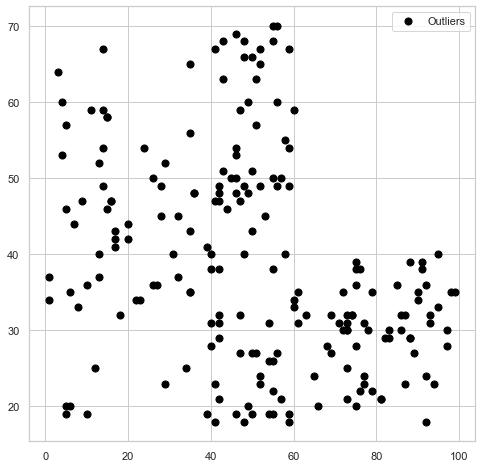

In [63]:
colors = ['g','r','b','y','burlywood','green', 'm', 'c']
plt.figure(figsize=(8,8))
for i in range(0 ,n_clusters_age - 1):
    plt.scatter(score_age_data[labels == i, 0], score_age_data[labels == i, 1], s = 100, c = colors[i], label = 'Cluster ' + str(i + 1))
plt.scatter(score_age_data[labels == -1, 0], score_age_data[labels == -1, 1], s = 50, c = 'black', label = 'Outliers')    
plt.legend()

Here there are 6 clusters with some black outliers. Well, the result also differs from K-means one. However, cluster 1 and 4 look reasonable and logic. Probably, it'd be better to unite some of the clusters 2,3,5,6 because they look to small to represent whole category of customers.

# Hierarchical clustering

- Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other


>  **I am going to use dendograms to find the optimal number of clusters**

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold (`Generally, we try to set the threshold in such a way that it cuts the tallest vertical line `)

### Spending score and annual income

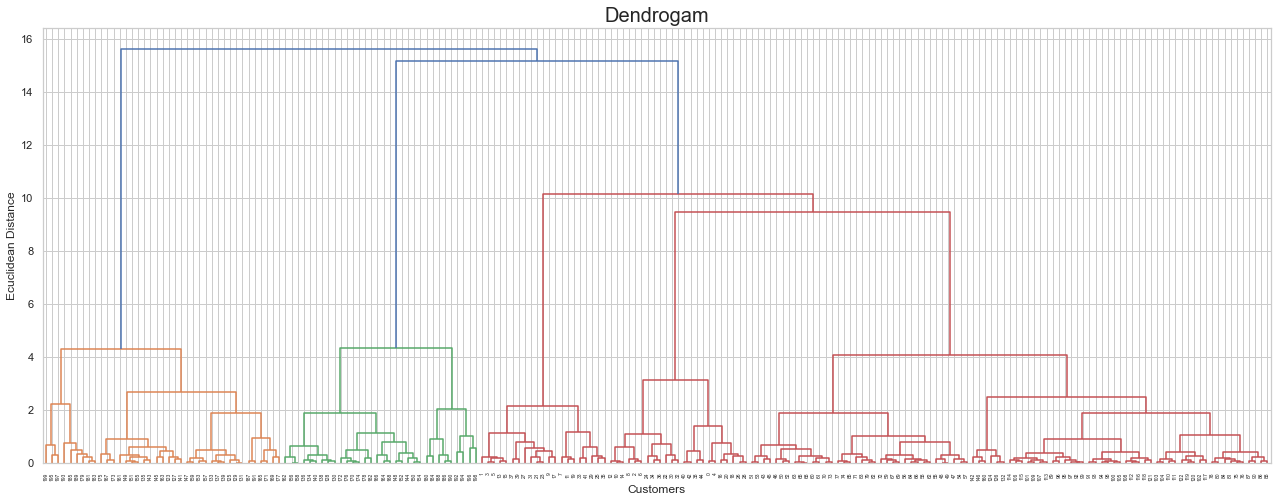

In [65]:

plt.figure(figsize=(22,8))
dendrogram = sch.dendrogram(sch.linkage(score_income_data, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


 More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram

<Figure size 1584x576 with 0 Axes>

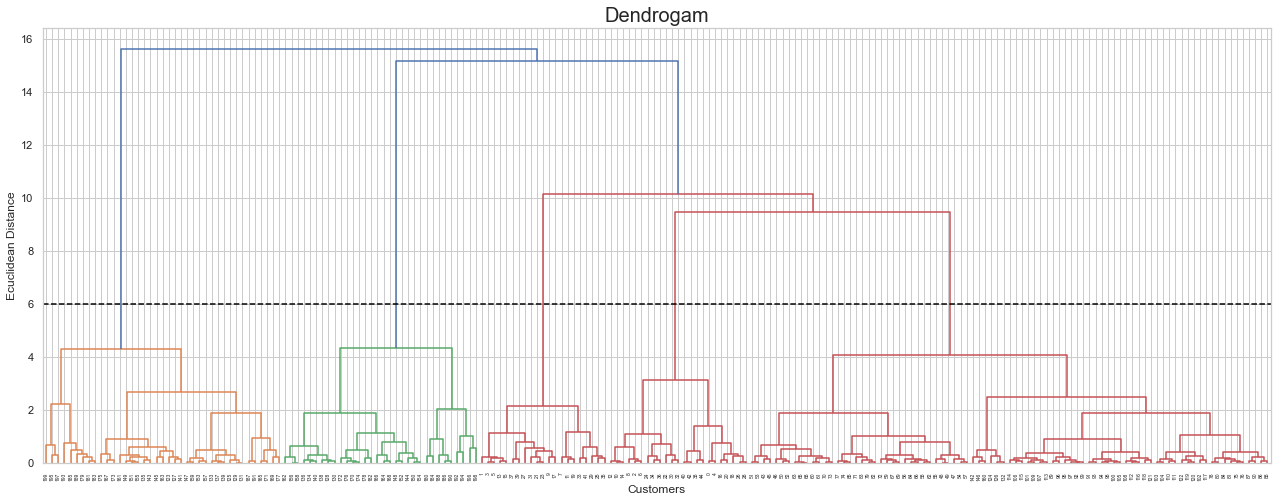

In [72]:
plt.figure(figsize=(22,8))


plt.figure(figsize=(22,8))
dendrogram = sch.dendrogram(sch.linkage(score_income_data, method = 'ward'))
#plot the vertical lines (the threshold)
plt.axhline(y=6, color='black', linestyle='--')
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()


Since the black line intersects 5 vertical lines, we will have 5 clusters. Which perfectly match what we found using KMeans and the DBSCAN algorithm and proved that 5 is the optimal number of cluster !!

### Spending score and age

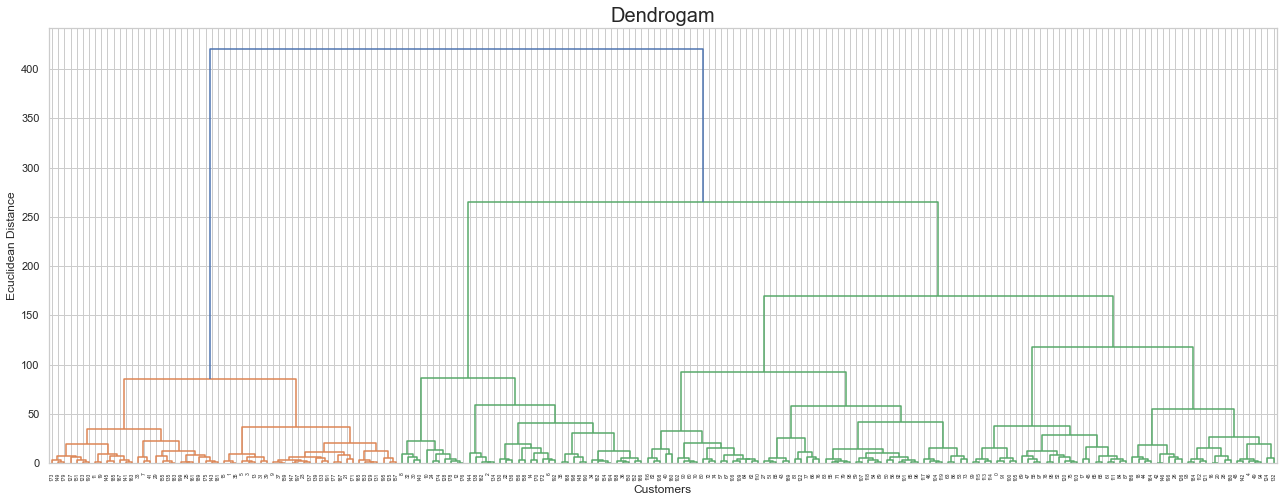

In [66]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(22,8))

dendrogram = sch.dendrogram(sch.linkage(score_age_data, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Again, the vertical line with maximum distance is the blue line and hence we can decide a threshold of 150 and cut the dendrogram

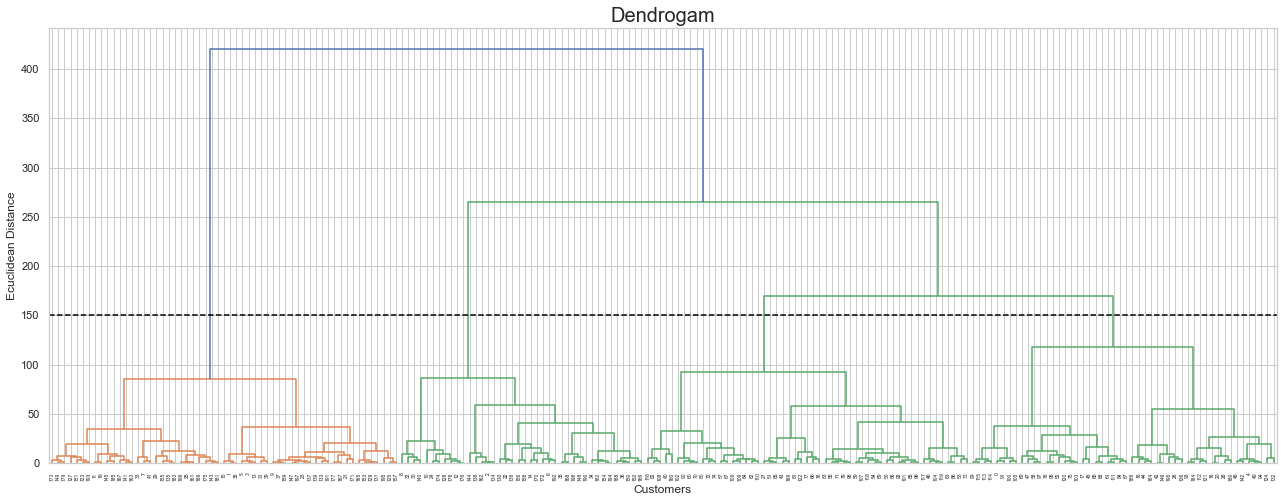

In [73]:
plt.figure(figsize=(22,8))

dendrogram = sch.dendrogram(sch.linkage(score_age_data, method = 'ward'))
#plot the vertical lines (the threshold)
plt.axhline(y=150, color='black', linestyle='--')
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

The black line intersects 4 vertical lines,thereby we will have 4 clusters.

# Results
All in all, we've successfuly found several groups that show the spending score of customers depending on their age or annual income.These groups could be applied in marketing in order to optimize the companies of attraction and retention as well as in strategic management and other business areas. Having the results of two algorithms it looks like K-means performs better for this need than DBSCAN in this particular task. However, this theory could be proven only after application of our results and testing.